In [30]:
from PIL import Image
import numpy as np
from numpy import asarray, expand_dims
from os import listdir
from os.path import isdir
import pandas as pd
import matplotlib.pyplot as plt

ERROR! Session/line number was not unique in database. History logging moved to new session 661


In [31]:
df = pd.read_csv('faces_train_embeddings.csv',index_col=0)

In [32]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,target
0,-1.646290,-1.687331,2.883557,-1.046404,0.356762,-0.031084,0.818687,1.042676,0.990864,-1.797787,...,-0.620700,0.441091,-0.397414,0.684068,-0.644207,-0.123236,0.243865,-0.861191,-0.262962,Dessa
1,-1.194539,-0.351180,0.847829,-1.458991,-0.670082,0.320437,1.117681,1.531365,-0.245236,-1.541856,...,-0.458893,2.197925,-0.467323,0.565679,-0.843947,-0.442665,-1.723495,-0.829319,-0.915569,Dessa
2,-1.459124,0.350540,1.922038,-1.547778,-0.076800,1.135906,2.339353,1.170720,1.278217,-1.286478,...,-0.758161,1.246184,0.017751,0.110696,0.255546,-0.881180,-0.652305,-1.156251,-1.029011,Dessa
3,-1.397213,-2.582741,1.606574,-0.014072,0.152207,0.110997,1.238310,1.298510,-0.061058,-0.169997,...,-0.850449,2.886897,-0.118972,0.003521,-1.562422,-0.469554,-0.094245,0.848792,-1.233757,Dessa
4,-0.556707,-1.063721,1.920441,-1.446446,-0.390729,0.597911,0.234126,1.192957,1.042021,-1.012844,...,0.516457,0.996243,-0.568146,1.012027,-0.807611,-0.534911,-1.295959,0.443297,0.799314,Dessa


In [33]:
# X = df - coluna target
X = np.array(df.drop('target', axis=1))
# y = coluna target
y = np.array(df.target)

In [34]:
#Shuffle dataset
from sklearn.utils import shuffle
trainX, trainY = shuffle (X,y, random_state=0)

In [35]:
#hot-encode labels
from sklearn.preprocessing import LabelEncoder

out_encoder = LabelEncoder()
out_encoder.fit(trainY)
trainY = out_encoder.transform(trainY)

In [36]:
#validation
df_val = pd.read_csv('faces_validation_embeddings.csv',index_col=0)
df_val.head(5)

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,target
0,-1.245843,-3.227210,2.465695,-0.917892,-0.273218,0.014268,0.960072,2.046350,0.770749,-1.729095,...,-0.944039,1.675355,-0.282118,0.183822,-0.653568,0.195866,-0.342965,0.134062,0.085601,Dessa
1,-1.820353,-1.927010,2.204384,-1.009596,0.881777,-0.266035,1.083478,0.185461,0.970948,-0.101829,...,-0.239811,1.173024,-0.469987,0.834028,0.029961,-1.558266,0.222502,-1.249710,-0.936888,Dessa
2,-1.396999,-1.730301,0.985809,-0.609296,0.259128,-0.350798,1.171645,1.098546,0.260584,0.165752,...,-2.360200,1.195297,0.235626,-0.853008,-1.222476,-1.174283,0.642346,-0.408757,-1.177594,Dessa
3,-1.636572,-0.296489,1.418785,-1.641847,0.345870,0.003038,1.054012,1.722565,0.826067,-1.871242,...,-0.836204,1.313731,0.584170,0.849724,-0.827995,-1.066870,-0.335423,-0.783864,-0.067064,Dessa
4,-0.927681,-0.953416,3.014898,-2.241177,-0.365648,0.755285,0.518138,1.552790,0.988955,-1.952708,...,-1.770725,1.579803,-0.078469,0.435631,-0.343946,-0.115035,-0.751708,-1.119460,-0.966538,Dessa


In [37]:
#split X and Y validation
valX = np.array(df_val.drop('target',axis=1))
valY = np.array(df_val.target)

In [38]:
#hot encoder validation Y
out_encoder.fit(valY)
valY = out_encoder.transform(valY)

# Evaluating algorithms

### KNN

In [39]:

from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn = KNeighborsClassifier(n_neighbors=5)

In [41]:
knn.fit(trainX, trainY)

KNeighborsClassifier()

In [42]:
#evaluate the knn model
yhat_train = knn.predict(trainX)
yhat_val = knn.predict(valX)

In [43]:
valY

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [44]:
yhat_val.shape

(14,)

In [45]:
from sklearn.metrics import confusion_matrix
def print_confusion_matrix(model_name, valY, yhat_val):
    cm = confusion_matrix(valY, yhat_val)
    total = sum(sum(cm))
    acc = (cm[0,0]+cm[1,1])/ total
    sensitivity = cm[0,0]/(cm[0,0] + cm[0,1])
    specificity = cm[1,1]/(cm[1,0] + cm[1,1])
    
    print("Modelo: {}".format(model_name))
    print("Acurácia: {:4f}".format(acc))
    print("Sensitividade: {:4f}".format(sensitivity))
    print("Especificidade: {:4f}".format(specificity))
    
    from mlxtend.plotting import plot_confusion_matrix
    fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(5,5))
    plt.show()

Modelo: KNN
Acurácia: 1.000000
Sensitividade: 1.000000
Especificidade: 1.000000


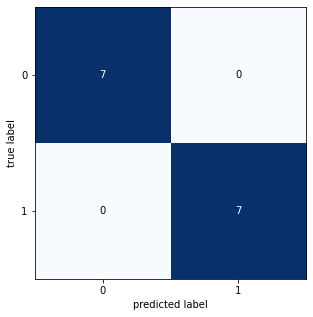

In [46]:
print_confusion_matrix("KNN",valY,yhat_val)

### SVM

In [47]:
from sklearn import svm

svm = svm.SVC()
svm.fit(trainX, trainY)

SVC()

In [48]:
#evaluate the knn model
yhat_train = svm.predict(trainX)
yhat_val = svm.predict(valX)

Modelo: SVM
Acurácia: 1.000000
Sensitividade: 1.000000
Especificidade: 1.000000


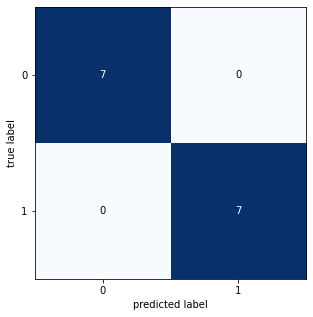

In [49]:
print_confusion_matrix("SVM", valY, yhat_val)

### Multilayer perceptron

In [50]:
from tensorflow.keras.utils import to_categorical

In [51]:
#classe vira uma posicao (class 1, class 2)
trainY = to_categorical(trainY)
valY = to_categorical(valY)

In [52]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [53]:
model = models.Sequential()
model.add(layers.Dense(64,activation="relu",input_shape=(128,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2,activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 8,386
Trainable params: 8,386
Non-trainable params: 0
_________________________________________________________________


In [54]:
import tensorflow as tf
model.compile(optimizer="adam",
             loss = "categorical_crossentropy",
             metrics = ['accuracy']
             #metrics = [tf.keras.metrics.Recall()]
             )



In [ ]:
model.fit(trainX, trainY, epochs=15, batch_size=8)
model.save("test.h5")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\diego\.conda\envs\py34\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\diego\AppData\Local\Temp/ipykernel_17568/2663255996.py", line 1, in <module>
    model.fit(trainX, trainY, epochs=15, batch_size=8)
  File "C:\Users\diego\.conda\envs\py34\lib\site-packages\tensorflow_core\python\keras\engine\training.py", line 819, in fit
    use_multiprocessing=use_multiprocessing)
  File "C:\Users\diego\.conda\envs\py34\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py", line 235, in fit
    use_multiprocessing=use_multiprocessing)
  File "C:\Users\diego\.conda\envs\py34\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py", line 593, in _process_training_inputs
    use_multiprocessing=use_multiprocessing)
  File "C:\Users\diego\.conda\envs\py34\lib\site-packages\tensorflow_core\python\keras\engine\training_v2.py"

In [55]:
#evaluate the knn model
yhat_train = model.predict(trainX)
yhat_val = model.predict(valX)

ERROR! Session/line number was not unique in database. History logging moved to new session 662


In [56]:
valY = np.argmax(valY, axis=1)
yhat_val = np.argmax(yhat_val, axis=1)

Modelo: Multilayer perceptron
Acurácia: 0.500000
Sensitividade: 1.000000
Especificidade: 0.000000


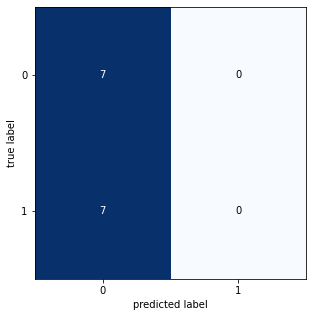

In [57]:
print_confusion_matrix("Multilayer perceptron", valY, yhat_val)